In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
# 将 matplotlib 生成的图表直接内嵌到notebook中
%matplotlib inline  
print ( " packs loaded")

 packs loaded


In [3]:
# load MNIST  data
mnist = input_data.read_data_sets("MNIST-data", one_hot = True)
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels

print (" MNIST ready")

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
 MNIST ready


In [4]:
# 构建 Convolution Neural Network 

n_input = 784
n_output = 10
weights = {
            'wc1' : tf.Variable( tf.random_normal( [ 3 ,  3 , 1 , 64 ],  stddev = 0.1)) , 
            'wd1' : tf.Variable( tf.random_normal( [ 14 * 14 * 64 ,  n_output] ,  stddev = 0.1))
}
biases = {
            'bc1' : tf.Variable(tf.random_normal( [ 64 ] ,  stddev = 0.1 )) ,
            'bd1' : tf.Variable( tf.random_normal( [ n_output ] , stddev = 0.1))
}

def  conv_simple( _input ,  _w , _b) :
    _input_r = tf.reshape( _input , shape = [ -1, 28 , 28, 1 ] )  #  Reshape  input
    
    _conv1 = tf.nn.conv2d( _input_r , _w[ 'wc1' ] ,  strides = [ 1 , 1 , 1, 1 ] ,  padding = 'SAME' )  # Convolution
    
    _conv2 = tf.nn.bias_add( _conv1 , _b[ 'bc1' ] )  # Add  bias
    
    _conv3 = tf.nn.relu( _conv2 )  #  Pass  ReLu
    
    _pool   = tf.nn.max_pool( _conv3 , ksize = [ 1, 2, 2, 1 ] ,  strides = [ 1, 2, 2, 1 ] ,  padding = 'SAME' )  # Max-pooling
    
    _dense = tf.reshape( _pool , [ -1 ,  _w[ 'wd1' ] . get_shape() . as_list() [ 0 ] ]  )  #  Vectorize
    
    _out     = tf.add( tf.matmul( _dense , _w[ 'wd1' ] ) , _b[ 'bd1' ] )   #   Fully - connected  layer
   
    out = { 'input_r' : _input_r , 'conv1' : _conv1 , 'conv2' : _conv2 , 'conv3' : _conv3 , 'pool' : _pool , 'dense' : _dense , 'out' : _out }  # Return  everything
    
    return out 

print ( " CNN  get  ready ! " )

 CNN  get  ready ! 


In [5]:
# tf  Graph  input
x = tf.placeholder( tf.float32, [ None , n_input] )
y = tf.placeholder( tf.float32, [ None , n_output] )



In [6]:
# Parameters
learning_rate       = 0.001
training_epochs   = 5
batch_size            = 100
display_step       = 1



In [7]:
# Functions ! 333
_pred = conv_simple( x , weights , biases ) [ 'out' ]

cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = _pred , labels = y ) )   #   TF1.0 bug  fixed  必须加等式

optm = tf.train.AdamOptimizer( learning_rate = learning_rate ).minimize( cost ) 

_corr = tf.equal(tf.argmax( _pred , 1) , tf.argmax( y , 1 ) )  # count  corrects

accr = tf.reduce_mean( tf.cast( _corr , tf.float32) )  #  Accuracy

init = tf.global_variables_initializer()


In [8]:
# Saver
save_step = 1;

savedir = " nets/ "

saver = tf.train.Saver( max_to_keep = training_epochs )

print ( " Network  ready  to  Go ! " )

 Network  ready  to  Go ! 


In [9]:
do_train = 1 

# do some optimizations
sess = tf.Session()
sess.run(init)

if do_train == 1:
    for epoch in range ( training_epochs) : 
            avg_cost = 0.
            total_batch = int ( mnist.train.num_examples/batch_size)
            
            # 循环 all  batches
            for i in range ( total_batch ) :
                batch_xs , batch_ys = mnist.train.next_batch( batch_size )
                
                # fit training using batch data
                sess.run( optm , feed_dict = { x: batch_xs , y: batch_ys} ) 
                
                # compute average loss 
                avg_cost += sess.run( cost , feed_dict = { x: batch_xs , y: batch_ys}) / total_batch
                
            # Display logs per epoch step
            if epoch % display_step == 0 :
                print ( " Epoch :  %4d / %4d  cost : %.9f "  %  (epoch , training_epochs , avg_cost ) )
                
                train_acc  = sess.run( accr , feed_dict = { x: batch_xs ,  y: batch_ys} )
                
                print ( " Training accuracy : %.3f "  %  ( train_acc ) )
                
                test_acc = sess.run( accr , feed_dict = { x: testimg ,  y: testlabel} )
                
                print ( " Test accuracy :  %.3f "   %  ( test_acc ) )
                
            # Save Net
         #   if epoch  %  save_step == 0 :
          #      saver.save( sess , " nets/cnn_sample.ckpt - " + str(epoch) )
        
    print ( " Optimization finished ! ")

 Epoch :     0 /    5  cost : 0.350691188 
 Training accuracy : 0.970 
 Test accuracy :  0.956 
 Epoch :     1 /    5  cost : 0.107337555 
 Training accuracy : 0.960 
 Test accuracy :  0.976 
 Epoch :     2 /    5  cost : 0.074798108 
 Training accuracy : 0.970 
 Test accuracy :  0.977 
 Epoch :     3 /    5  cost : 0.059408131 
 Training accuracy : 0.990 
 Test accuracy :  0.980 
 Epoch :     4 /    5  cost : 0.050595923 
 Training accuracy : 0.980 
 Test accuracy :  0.981 
 Optimization finished ! 


In [10]:
# display
conv_out = conv_simple( x, weights, biases )

input_r = sess.run( conv_out [ 'input_r'] , feed_dict = { x: trainimg[ 0:1 ,  : ] } )
conv1 = sess.run(conv_out [ 'conv1'] , feed_dict = { x: trainimg[ 0:1 ,  : ] } )
conv2 = sess.run( conv_out [ 'conv2'] , feed_dict = { x: trainimg[ 0:1 ,  : ] } )
conv3 = sess.run(conv_out [ 'conv3'] , feed_dict = { x: trainimg[ 0:1 ,  : ] } )
pool = sess.run(conv_out [ 'pool'] , feed_dict = { x: trainimg[ 0:1 ,  : ] } )


 Size of  'input_r'   is  (1, 28, 28, 1) 
 Label is 7


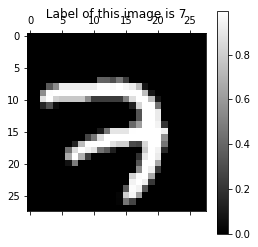

In [18]:
#  display  'input_r'
print (" Size of  'input_r'   is  %s "   %  (input_r.shape , ) ) 
label = np.argmax(trainlabel[0, : ] )
print ( " Label is %d"  % (label) )

# plot
plt.matshow(input_r[0, : , : , 0 ]  , cmap = plt.get_cmap( 'gray' ) )
plt.title( " Label of this image is "  +  str( label )  +  " ")
plt.colorbar()
plt.show()